# Problem 2 of the Fittlyf Assignment:

A dataset was provided by the company along with a set of questions, which have to answered and submitted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
dataframe = pd.read_csv('fittlyf_data.csv')
df = dataframe
df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26T11:07:54.577000000,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26T11:07:52.755000000,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26T10:21:28.027000000,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26T11:08:33.552000000,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26T11:08:12.789000000,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER
...,...,...,...,...,...,...,...,...,...,...,...,...
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,2019-05-04T06:26:13.977000000,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76932,72dbfeef017200#d006272601cffd723e72672,72dbfeef017200#d006272601cffd723e7267,T2,5/3/2019,2019-05-04T06:26:54.063000000,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,2019-05-04T06:29:47.978000000,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76934,72dc2b03517200#d0472b129343fd72472fe3,72dc2b03517200#d0472b129343fd72472fe2,T3,5/3/2019,2019-05-04T06:29:53.771000000,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER


### Some information regarding the variables of the dataset: 
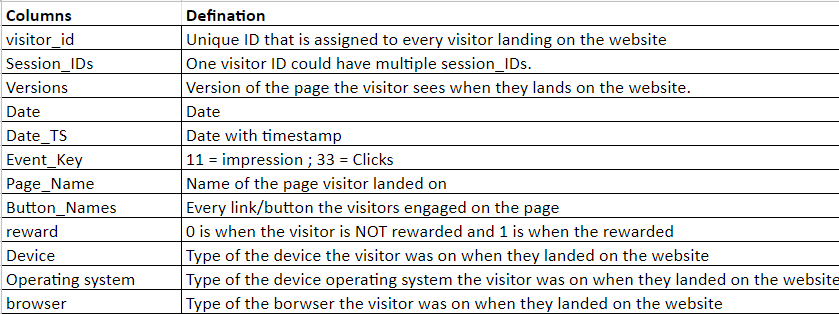




The screenshot has been taken from the dataset dictionary provided by the company. 

## Exploring the Dataset: 

In [4]:
dataframe.isna().sum()

visitor_id          0
Session_IDs         0
Versions            0
Date                0
Date_TS             0
Event_Key           0
Page_Name           0
Button_Names        0
reward              0
Device              0
Operating system    0
browser             0
dtype: int64

The dataframe does not have any missing values so there is no need to provide arbitrary values for missing data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76936 entries, 0 to 76935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   visitor_id        76936 non-null  object
 1   Session_IDs       76936 non-null  object
 2   Versions          76936 non-null  object
 3   Date              76936 non-null  object
 4   Date_TS           76936 non-null  object
 5   Event_Key         76936 non-null  int64 
 6   Page_Name         76936 non-null  object
 7   Button_Names      76936 non-null  object
 8   reward            76936 non-null  int64 
 9   Device            76936 non-null  object
 10  Operating system  76936 non-null  object
 11  browser           76936 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.0+ MB


In [6]:
df.describe()

,Event_Key,reward
count,76936.000000,76936.000000
mean,19.582848,0.075218
std,10.731210,0.263745
min,11.000000,0.000000
25%,11.000000,0.000000
50%,11.000000,0.000000
75%,33.000000,0.000000
max,33.000000,1.000000


## Ques1. Creating the Batch Column: 

#### Calculating the minimum date and time from the column 'Date_TS': 

In [7]:
date_ts = df['Date_TS']

min_date_ts = min(date_ts)
print(min_date_ts)

2019-04-26T09:49:13.443000000


The minimum date has been stored in min_date_ts.

#### Calculating the maximum date and time from the column 'Date_TS':

In [8]:
max_date_ts = max(date_ts)
print(max_date_ts)

2019-05-04T06:31:57.735000000


The maximum date has been stored in max_date_ts.

#### Calculating the number of days between the maximum and minimum dates: 

In [9]:
from datetime import date
 
def numOfDays(date1, date2):
    return (date2-date1).days

date1 = date(2019, 4, 26)
date2 = date(2019, 5, 4)

print(numOfDays(date1, date2))

8


#### Converting the column 'Date_TS' to type timestamp from type object:

In [10]:
df['Date_TS'] = pd.to_datetime(df['Date_TS'])

In [11]:
df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26 11:07:54.577,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26 11:07:52.755,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26 10:21:28.027,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26 11:08:33.552,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,2019-04-26 11:08:12.789,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER
...,...,...,...,...,...,...,...,...,...,...,...,...
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,2019-05-04 06:26:13.977,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76932,72dbfeef017200#d006272601cffd723e72672,72dbfeef017200#d006272601cffd723e7267,T2,5/3/2019,2019-05-04 06:26:54.063,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,2019-05-04 06:29:47.978,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76934,72dc2b03517200#d0472b129343fd72472fe3,72dc2b03517200#d0472b129343fd72472fe2,T3,5/3/2019,2019-05-04 06:29:53.771,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER


In [12]:
df['Date_TS'] = df.Date_TS.apply(lambda x: x.timestamp())

In [13]:
df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556274e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER
...,...,...,...,...,...,...,...,...,...,...,...,...
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76932,72dbfeef017200#d006272601cffd723e72672,72dbfeef017200#d006272601cffd723e7267,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER
76934,72dc2b03517200#d0472b129343fd72472fe3,72dc2b03517200#d0472b129343fd72472fe2,T3,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER


#### Creating tuples where the datetime differs by 12 hours, and printing a tuple of their respective timestamps: 

In [14]:
from datetime import datetime 
from dateutil.relativedelta import relativedelta

date1 = datetime(2019, 4, 26, 9, 49, 13)
date2 = datetime(2019, 5, 4, 6, 31, 57)

hour = date1.timetuple()[3]

i = 0
while i < 30 :
    if date1 <= date2 : 
        my_tuple = (date1, date1 + relativedelta(hours=12)) 
        print((my_tuple[0].timestamp() , my_tuple[1].timestamp()))
        
        date1 = date1 + relativedelta(hours=12)
        i = i + 1
    else : 
        break ;

(1556252353.0, 1556295553.0)
(1556295553.0, 1556338753.0)
(1556338753.0, 1556381953.0)
(1556381953.0, 1556425153.0)
(1556425153.0, 1556468353.0)
(1556468353.0, 1556511553.0)
(1556511553.0, 1556554753.0)
(1556554753.0, 1556597953.0)
(1556597953.0, 1556641153.0)
(1556641153.0, 1556684353.0)
(1556684353.0, 1556727553.0)
(1556727553.0, 1556770753.0)
(1556770753.0, 1556813953.0)
(1556813953.0, 1556857153.0)
(1556857153.0, 1556900353.0)
(1556900353.0, 1556943553.0)


#### Assigning batch values to specific dates : 


In [15]:
conditions = [(df['Date_TS'].between(1556252353.0, 1556295553.0)), 
(df['Date_TS'].between(1556295553.0, 1556338753.0)), 
(df['Date_TS'].between(1556338753.0, 1556381953.0)), 
(df['Date_TS'].between(1556381953.0, 1556425153.0)), 
(df['Date_TS'].between(1556425153.0, 1556468353.0)), 
(df['Date_TS'].between(1556468353.0, 1556511553.0)), 
(df['Date_TS'].between(1556511553.0, 1556554753.0)), 
(df['Date_TS'].between(1556554753.0, 1556597953.0)), 
(df['Date_TS'].between(1556597953.0, 1556641153.0)), 
(df['Date_TS'].between(1556641153.0, 1556684353.0)), 
(df['Date_TS'].between(1556684353.0, 1556727553.0)), 
(df['Date_TS'].between(1556727553.0, 1556770753.0)), 
(df['Date_TS'].between(1556770753.0, 1556813953.0)), 
(df['Date_TS'].between(1556813953.0, 1556857153.0)), 
(df['Date_TS'].between(1556857153.0, 1556900353.0)), 
(df['Date_TS'].between(1556900353.0, 1556943553.0))]


batches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

df['Batch_Number'] = np.select(conditions, batches, default = 17)

df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556274e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER,1
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER,1
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76932,72dbfeef017200#d006272601cffd723e72672,72dbfeef017200#d006272601cffd723e7267,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76934,72dc2b03517200#d0472b129343fd72472fe3,72dc2b03517200#d0472b129343fd72472fe2,T3,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


The dataset has been divided into 17 batches according to the dates and timestamps. 

## Ques2. Finding which 'version' of the website has the highest reward rate: 
Reward rate is defined as Count (distinct Session _id where reward = 1)/count(distinct Session_id where reward = 0)


#### getting distinct values of the versions of website: 

In [16]:
df.Versions.unique()

array(['T2', 'Control', 'T3', 'T1'], dtype=object)

#### getting unique session IDs, along with the total number of unique session IDs: 

In [17]:
print(df.Session_IDs.unique())
len(df.Session_IDs.unique())

['65614647217200#772726df65fe72ff0f72674'
 '6600c9fc17200##10f1f50b45ff0#72d726' '66495d5717200##111##3e#52ff072ef4'
 ... '72dc29b77217200#d0075cde7292fd727271#2'
 '72dc2b03517200#d0472b129343fd72472fe2'
 '72dc493cc17200#d00596fb0d1fd723c#39']


34876

#### Rows with T1 version of the website and unique Session IDs: 

In [18]:
T1_version_df = df.loc[df['Versions'] == 'T1']

T1_version_df.drop_duplicates(subset=['Session_IDs'])

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
15,66c5#26c17200#d0466c37029fee#65c#,66c5#26c17200#d0466c37029fee#65c9,T1,4/26/2019,1.556297e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,2
39,67cb22b017200#2720cfd06726ffefd5#972,67cb22b017200#2720cfd06726ffefd5#97,T1,4/26/2019,1.556314e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER,2
44,1d5679b917c0##3020e70d41ffffffff,67225f45b17200#7#096ee0c3dfef4cb721,T1,4/26/2019,1.556321e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
48,691b427417200#2720d057272#17fef1e3b3,691b427417200#2720d057272#17fef1e3b2,T1,4/26/2019,1.556337e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
49,69bf312b17200#2720ce4c63f72feed0cb5,69bf312b17200#2720ce4c63f72feed0cb4,T1,4/26/2019,1.556348e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76921,72db07d#717200#2d1e0f54d12fdc6b1f3,72db07d#717200#2d1e0f54d12fdc6b1f2,T1,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76924,72db50b1417200#7#05353f30#fdc7ec0d,72db50b1417200#7#05353f30#fdc7ec0c,T1,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76930,72dbe72ec617200#7#07dc3cf49fdc77d272,72dbe72ec617200#7#07dc3cf49fdc77d27,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


##### count of reward = 1 and reward = 0 for version T1 and unique session IDs: 

In [19]:
T1_version_df['reward'].value_counts()

0    22298
1     1900
Name: reward, dtype: int64

##### Calculating reward rate of version T1:

In [20]:
reward_rate_t1 = len(T1_version_df[T1_version_df.reward == 1]) / len(T1_version_df[T1_version_df.reward == 0])
print(reward_rate_t1)

0.0852094358238407


#### Rows with T2 version of the website and unique Session IDs: 

In [21]:
T2_version_df = df.loc[df['Versions'] == 'T2']
T2_version_df

T2_version_df.drop_duplicates(subset=['Session_IDs'])

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
13,0ec772437217200#72#517176912ffffffff,66#fdf5317200#d0059c9b4f2feeb55e5,T2,4/26/2019,1.556296e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER,2
20,6716779917200#d047ef2b72b1fee729cf,6716779917200#d047ef2b72b1fee729ce,T2,4/26/2019,1.556303e+09,33,main:help:chat:sales:widget:::,sales-invitation-close,0,Desktop,WINDOWS,INTERNET EXPLORER,2
51,4720794fd17200#2d16c0cfce0fff7206372,6#72b7427217200#d046#727e#1dfec72b272c,T2,4/27/2019,1.556361e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,3
57,6bcd7260c17200#1d2c7292b25cfed903720,6bcd7260c17200#1d2c7292b25cfed9037f,T2,4/27/2019,1.556382e+09,11,main:help:chat:sales:widget:::,sales-invitation-docked-start-chat,0,Desktop,WINDOWS,INTERNET EXPLORER,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76925,72db6e15617200#d049c5f72#71fd724bb#4,72db6e15617200#d049c5f72#71fd724bb#3,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76927,72db972b4917200#d005#c9214dfd7242172f,72db972b4917200#d005#c9214dfd7242172e,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76928,72dbbbe#917200#d0076444e17fd724c61d,72dbbbe#917200#d0076444e17fd724c61c,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


##### count of reward = 1 and reward = 0 for version T2 and unique session IDs: 

In [22]:
T2_version_df['reward'].value_counts()

0    14882
1     1195
Name: reward, dtype: int64

##### Calculating reward rate of version T2:

In [23]:
reward_rate_t2 = len(T2_version_df[T2_version_df.reward == 1]) / len(T2_version_df[T2_version_df.reward == 0])
print(reward_rate_t2)

0.08029834699637145


#### Rows with T3 version of the website and unique Session IDs: 

In [24]:
T3_version_df = df.loc[df['Versions'] == 'T3']
T3_version_df

T3_version_df.drop_duplicates(subset=['Session_IDs'])

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
10,66495d5717200##111##3e#52ff072ef5,66495d5717200##111##3e#52ff072ef4,T3,4/26/2019,1.556289e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
11,e406dde31730#300514feb72bf#b747244,6694425917200#1d32f321d9cff04f115,T3,4/26/2019,1.556294e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER,1
24,671692bb17200#d00572b#9517fee734eb,671692bb17200#d00572b#9517fee734e#,T3,4/26/2019,1.556303e+09,33,main:help:chat:sales:widget:::,sales-invitation-close,0,Desktop,WINDOWS,INTERNET EXPLORER,2
45,672b2104b17200#d0073#3d9721fed3b3b7,672b2104b17200#d0073#3d9721fed3b3b6,T3,4/26/2019,1.556330e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,2
79,6d11516#17200#d04572f3e0e#fe#db0d0,6d11516#17200#d04572f3e0e#fe#db0cf,T3,4/27/2019,1.556403e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76898,72d905f7#17200#276e16c20dcff204c1d,72d905f7#17200#276e16c20dcff204c1c,T3,5/3/2019,1.556948e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76910,72d#2#4e717200#772726e797c7bfdc72b7bd,72d#2#4e717200#772726e797c7bfdc72b7bc,T3,5/3/2019,1.556949e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76914,72d#73b6317200#7#067229c62efdc93ff2,72d#73b6317200#7#067229c62efdc93ff1,T3,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76916,72d#95c#f17200#772726c7ee05#fdc95c6b,72d#95c#f17200#772726c7ee05#fdc95c6#,T3,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


##### count of reward = 1 and reward = 0 for version T3 and unique session IDs: 

In [25]:
T3_version_df['reward'].value_counts()

0    16980
1     1328
Name: reward, dtype: int64

##### Calculating reward rate of version T3:

In [26]:
reward_rate_t3 = len(T3_version_df[T3_version_df.reward == 1]) / len(T3_version_df[T3_version_df.reward == 0])
print(reward_rate_t3)

0.07820965842167256


#### Rows with Control version of the website and unique Session IDs: 

In [27]:
control_version_df = df.loc[df['Versions'] == 'Control']
control_version_df

control_version_df.drop_duplicates(subset=['Session_IDs'])

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
8,17b34be#1770#760c4#e27##ff0#72036,6600c9fc17200##10f1f50b45ff0#72d726,Control,4/26/2019,1.556285e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
16,66e72b40c17200#7727272395272d6ff05501#,66e72b40c17200#7727272395272d6ff055019,Control,4/26/2019,1.556300e+09,11,main:help:chat:sales:widget:::,sales-invitation-docked-start-chat,0,Desktop,WINDOWS,INTERNET EXPLORER,2
32,6755#c0#17200#7727267297fc06fefc726#b,6755#c0#17200#7727267297fc06fefc726##,Control,4/26/2019,1.556307e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,2
34,676c7296417200#610ce7#b5720fefcb996,676c7296417200#610ce7#b5720fefcb995,Control,4/26/2019,1.556308e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
37,b400372c71710#4#1d016e277ffffffff,67c272f#617200#d0067760242fedd7657,Control,4/26/2019,1.556314e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76918,72d#c1cf7217200#7#0720172fc0cfdc951df,72d#c1cf7217200#7#0720172fc0cfdc951de,Control,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76919,72d#d9db7217200#61090721fb16fdc6e403,72d#d9db7217200#61090721fb16fdc6e402,Control,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76923,72db50#c917200#7#07210e45bdfdc90b4d,72db50#c917200#7#07210e45bdfdc90b4c,Control,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76926,72db97725917200#d045c45e172dfd72461fe,72db97725917200#d045c45e172dfd72461fd,Control,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


##### count of reward = 1 and reward = 0 for version control and unique session IDs: 

In [28]:
control_version_df['reward'].value_counts()

0    16989
1     1364
Name: reward, dtype: int64

##### Calculating reward rate of version Control:

In [29]:
reward_rate_control = len(control_version_df[control_version_df.reward == 1]) / len(control_version_df[control_version_df.reward == 0])
print(reward_rate_control)

0.08028724468773912


#### Maximum value of the reward rate across all the versions of the website: 

In [30]:
max(reward_rate_t1, reward_rate_t2, reward_rate_t3, reward_rate_control)

0.0852094358238407

From the above data, Version T1 has the maximum reward rates among all the versions. 

## Ques3. Build a graph which would show us the traffic allocation of different versions across different batches.

##### converting data into wide-format:

In [31]:
data_wide = df.pivot(columns='Versions',
                     values='Batch_Number')
data_wide

Versions,Control,T1,T2,T3
0,NaN,NaN,1.0,NaN
1,NaN,NaN,1.0,NaN
2,NaN,NaN,1.0,NaN
3,NaN,NaN,1.0,NaN
4,NaN,NaN,1.0,NaN
...,...,...,...,...
76931,NaN,NaN,17.0,NaN
76932,NaN,NaN,17.0,NaN
76933,NaN,17.0,NaN,NaN
76934,NaN,NaN,NaN,17.0


##### plotting the line graph:

Text(0.5, 0, 'Batch Number')

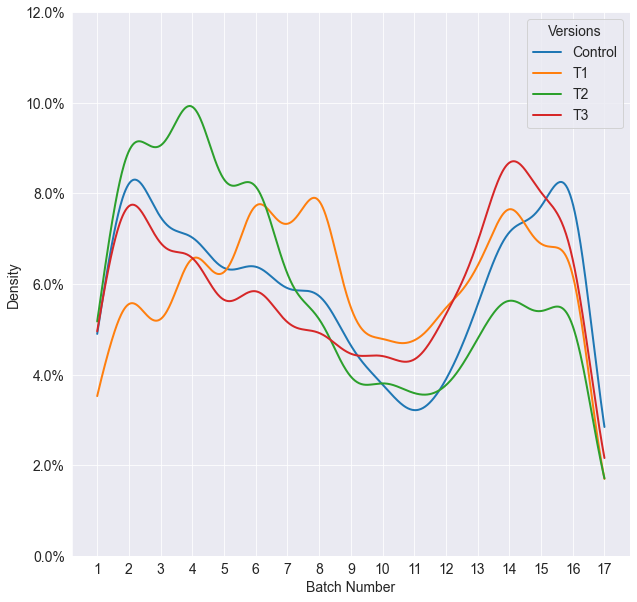

In [32]:
minX, maxX = (1,17)
data_wide.plot.density(ind=np.linspace(minX, maxX, 700), figsize = (10,10), linewidth = 2)
plt.ylim(0, 0.12)
plt.xticks([1, 2, 3, 4, 5,6,7,8,9,10, 11, 12, 13, 14, 15, 16, 17])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Batch Number")

## Ques4. What are the top 5 Button_Names which were clicked?
Find the button_name which has the greatest number of Session _ID with clicks.

In [33]:
df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556274e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER,1
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER,1
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76931,72dbf51ed17200#d049b3d7e4bfd95727261,72dbf51ed17200#d049b3d7e4bfd95727260,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76932,72dbfeef017200#d006272601cffd723e72672,72dbfeef017200#d006272601cffd723e7267,T2,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76934,72dc2b03517200#d0472b129343fd72472fe3,72dc2b03517200#d0472b129343fd72472fe2,T3,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


#### Making a new dataframe which contains information regarding only clicks: 

In [34]:
clicks_df = df.loc[df['Event_Key'] == 33]

In [35]:
clicks_df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,1
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556274e+09,33,product:business:::,HeaderMainMenu0-Cta-Log In,0,Desktop,WINDOWS,INTERNET EXPLORER,1
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER,1
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,4/26/2019,1.556277e+09,33,product:business:::,SMB grid greyCard-Tertiary-More about business...,0,Desktop,WINDOWS,INTERNET EXPLORER,1
9,17b34be#1770#760c4#e27##ff0#72036,6600c9fc17200##10f1f50b45ff0#72d726,Control,4/26/2019,1.556285e+09,33,product:business:::,HeaderMainMenu-Link-Personal,0,Desktop,WINDOWS,INTERNET EXPLORER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69875,b724cf0311760#7727272c905c2f27222933,72db92f2b17200#772727ec119cffdc7d61c,T1,5/3/2019,1.556951e+09,33,product:business:::,EnhancedFooter-Link-FirstColumn-Accept Payments,0,Mobile,ANDROID,CHROME MOBILE,17
69877,72dbf6bb017200#772726ce0d579fdc722d9f,72dbf6bb017200#772726ce0d579fdc722d9e,T1,5/3/2019,1.556951e+09,33,product:business:::,HeaderMainMenu0-Cta-My fyttlyf,0,Mobile,ANDROID,CHROME MOBILE,17
69878,72dbf6bb017200#772726ce0d579fdc722d9f,72dbf6bb017200#772726ce0d579fdc722d9e,T1,5/3/2019,1.556951e+09,33,product:business:::,HeaderMainMenu0-Cta-My fyttlyf,0,Mobile,ANDROID,CHROME MOBILE,17
69881,72d9c913f17200#27572c4257273fdc72426,72dc3#72e7217200#77205b547250cfebc6e9d,Control,5/3/2019,1.556951e+09,33,product:business:::,Hero-Primary-Sign Up,1,Mobile,ANDROID,CHROME MOBILE,17


#### Finding all the button names that are unique: 

In [36]:
unique_button_df = df["Button_Names"].str.split("-", expand = True)
unique_button_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,HeaderMainMenu,Link,Business,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HeaderMainMenu,Link,Business,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,HeaderMainMenu0,Cta,Log In,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,HeaderMainMenu,Link,Help,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SMB grid greyCard,Tertiary,More about business financing,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76931,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76932,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76933,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76934,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### Removing columns which have all None values: 

In [37]:
unique_button_df.dropna(how='all', axis=1, inplace=True)
display(unique_button_df)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,HeaderMainMenu,Link,Business,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HeaderMainMenu,Link,Business,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,HeaderMainMenu0,Cta,Log In,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,HeaderMainMenu,Link,Help,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SMB grid greyCard,Tertiary,More about business financing,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76931,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76932,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76933,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
76934,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


No column in the dataframe has all none values.

#### Finding the top 5 button names from the dataset given: 

In [38]:
unique_button_df.columns = unique_button_df.columns.astype(str)

In [39]:
unique_button_df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [40]:
unique_button_df = pd.concat([unique_button_df[column].value_counts() for column in unique_button_df], axis = 1)

In [41]:
unique_button_df['Sum'] = unique_button_df.sum(axis=1, numeric_only=True)
unique_button_df = unique_button_df.sort_values(by='Sum', ascending = False)
unique_button_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Sum
#,28357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28357.0
Cta,NaN,10571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10571.0
sales,10163.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10164.0
invitation,NaN,10046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10046.0
HeaderMainMenu0,8352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8352.0
Log In,NaN,NaN,7450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7450.0
chat,1502.0,NaN,NaN,386.0,5409.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7297.0
Sign Up,NaN,NaN,7242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7242.0
start,NaN,1114.0,NaN,5409.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6523.0
Hero,6516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6516.0


The Top 5 button names that were clicked on the website are: #, 0.0, Cta, sales and invitation. 

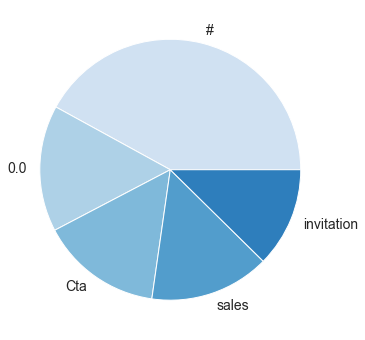

In [42]:
keys = ['#', '0.0', 'Cta', 'sales', 'invitation']

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 5))
plt.pie(unique_button_df['Sum'].head(5), labels=keys, colors = colors)
plt.show()

## Ques5.  Which Device, Operating system & browsers got the highest reward rate from the winning version you found out in question 1.

The version T1 of the website had the highest reward rate, so we will undergo an analysis using the T1_version_df. 

In [43]:
T1_version_df

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch_Number
15,66c5#26c17200#d0466c37029fee#65c#,66c5#26c17200#d0466c37029fee#65c9,T1,4/26/2019,1.556297e+09,11,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,2
39,67cb22b017200#2720cfd06726ffefd5#972,67cb22b017200#2720cfd06726ffefd5#97,T1,4/26/2019,1.556314e+09,33,product:business:::,HeaderMainMenu-Link-Help,0,Desktop,WINDOWS,INTERNET EXPLORER,2
40,67cb22b017200#2720cfd06726ffefd5#972,67cb22b017200#2720cfd06726ffefd5#97,T1,4/26/2019,1.556314e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
41,67cb22b017200#2720cfd06726ffefd5#972,67cb22b017200#2720cfd06726ffefd5#97,T1,4/26/2019,1.556315e+09,11,product:business:::,#,0,Desktop,WINDOWS,INTERNET EXPLORER,2
42,67cb22b017200#2720cfd06726ffefd5#972,67cb22b017200#2720cfd06726ffefd5#97,T1,4/26/2019,1.556314e+09,33,product:business:::,HeaderMainMenu-Link-Business,0,Desktop,WINDOWS,INTERNET EXPLORER,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76921,72db07d#717200#2d1e0f54d12fdc6b1f3,72db07d#717200#2d1e0f54d12fdc6b1f2,T1,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76924,72db50b1417200#7#05353f30#fdc7ec0d,72db50b1417200#7#05353f30#fdc7ec0c,T1,5/3/2019,1.556950e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76930,72dbe72ec617200#7#07dc3cf49fdc77d272,72dbe72ec617200#7#07dc3cf49fdc77d27,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17
76933,72dc29b77217200#d0075cde7292fd727271#3,72dc29b77217200#d0075cde7292fd727271#2,T1,5/3/2019,1.556951e+09,11,product:business:::,#,0,Mobile,ANDROID,ANDROID BROWSER,17


In [44]:
T1_version_df['Device'].value_counts()

Desktop    12714
Mobile     11116
Tablet       294
Others        74
Name: Device, dtype: int64

In [45]:
T1_version_df['browser'].value_counts()

CHROME               8104
CHROME MOBILE        5157
SAFARI               4313
ANDROID BROWSER      2355
OTHERS               2143
EDGE                 1417
FIREFOX               625
INTERNET EXPLORER      84
Name: browser, dtype: int64

In [46]:
T1_version_df['Operating system'].value_counts()

WINDOWS    8117
ANDROID    7918
IOS        3443
MAC        2829
OTHERS     1891
Name: Operating system, dtype: int64

The above value counts tell us that Device: Desktop, Browser: Chrome and Operating System:Windows got the highest reward rates in the T1 version of the website. 